In [63]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")

m = 1.9044117647078551 s
c = 0.055882352939113145 s
omega0 = 3.2992787713341256 rad/s


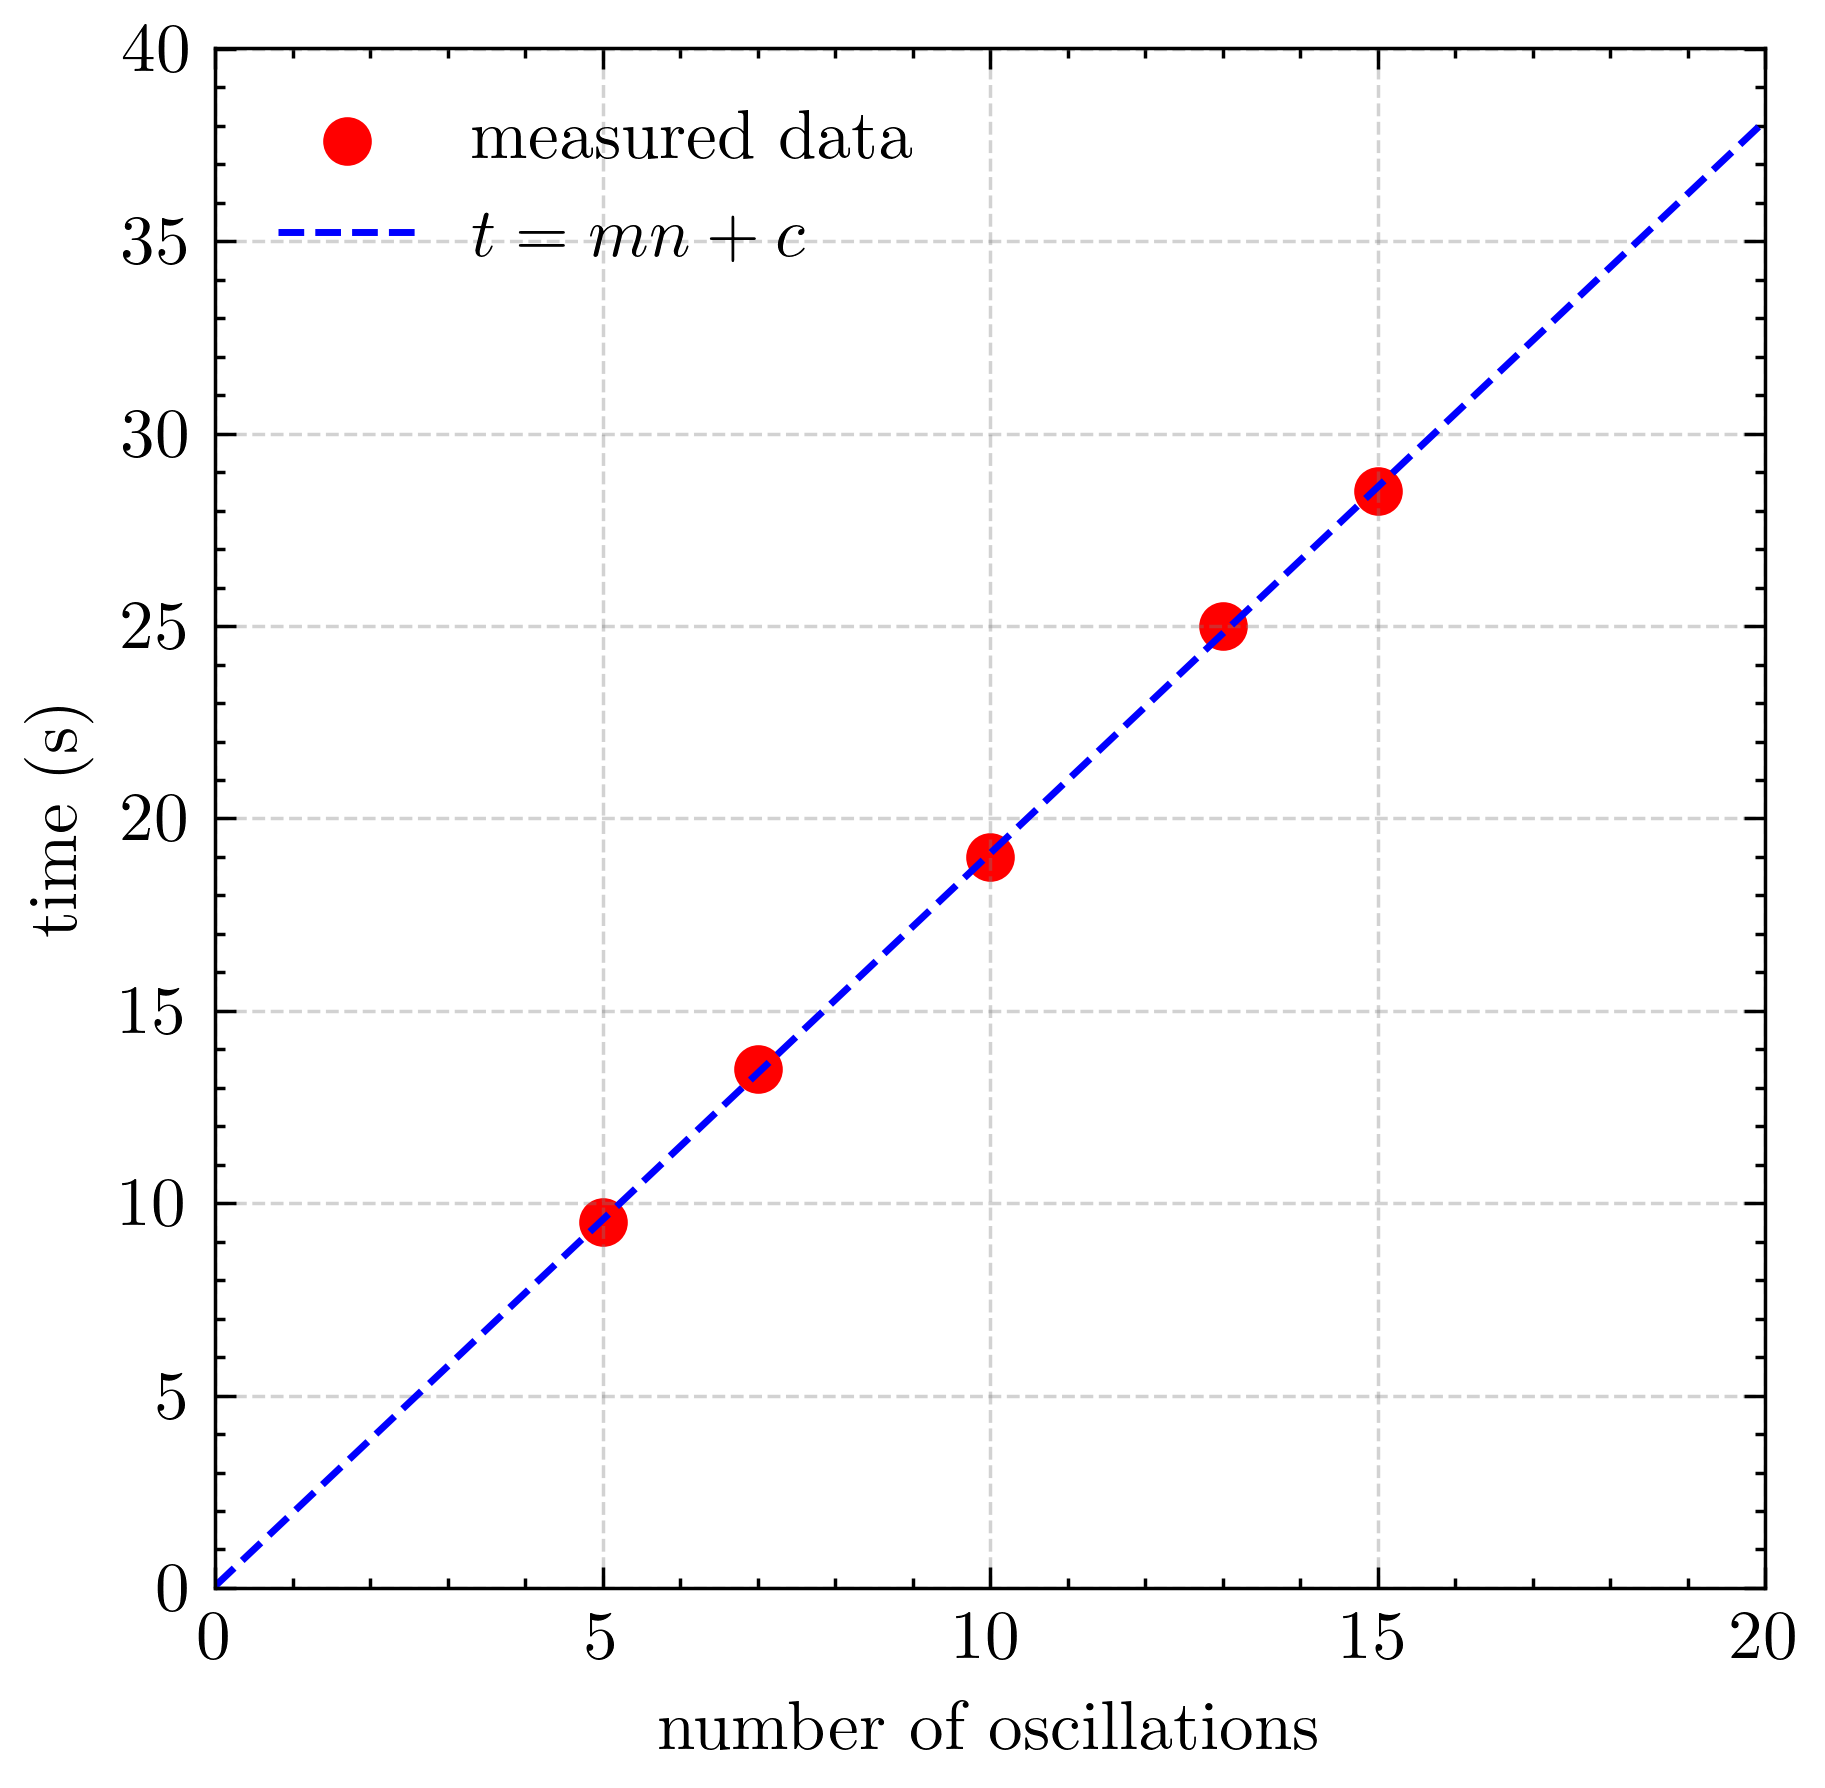

In [67]:
def straight_line(n, m, c):
    return m*n + c

data_undamped = np.loadtxt("undamped", unpack=True)

nData = data_undamped[0]
timeData = data_undamped[1]

popt, pcov = curve_fit(straight_line, nData, timeData)

print("m =", popt[0], "s")
print("c =", popt[1], "s")
print('omega0 =', 2*np.pi/popt[0], "rad/s")

n = data_undamped[0]
time = data_undamped[1]

plt.figure(dpi=500, figsize=(4, 4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)
plt.scatter(n, time, label="measured data", c="r")
plt.plot(np.arange(0, 20, 0.01), straight_line(np.arange(0, 20, 0.01), *popt), 'b--', label=r"$t = m n + c$")
plt.xlabel("number of oscillations")
plt.ylabel("time (s)")
plt.legend()
plt.xlim(0, 20)
plt.ylim(0, )
plt.show()

A = 10.232166433609374
gamma = 0.07303590375167196 1/s
omega = 3.313659677127829 rad/s
phi = 11.855811629913084 rad


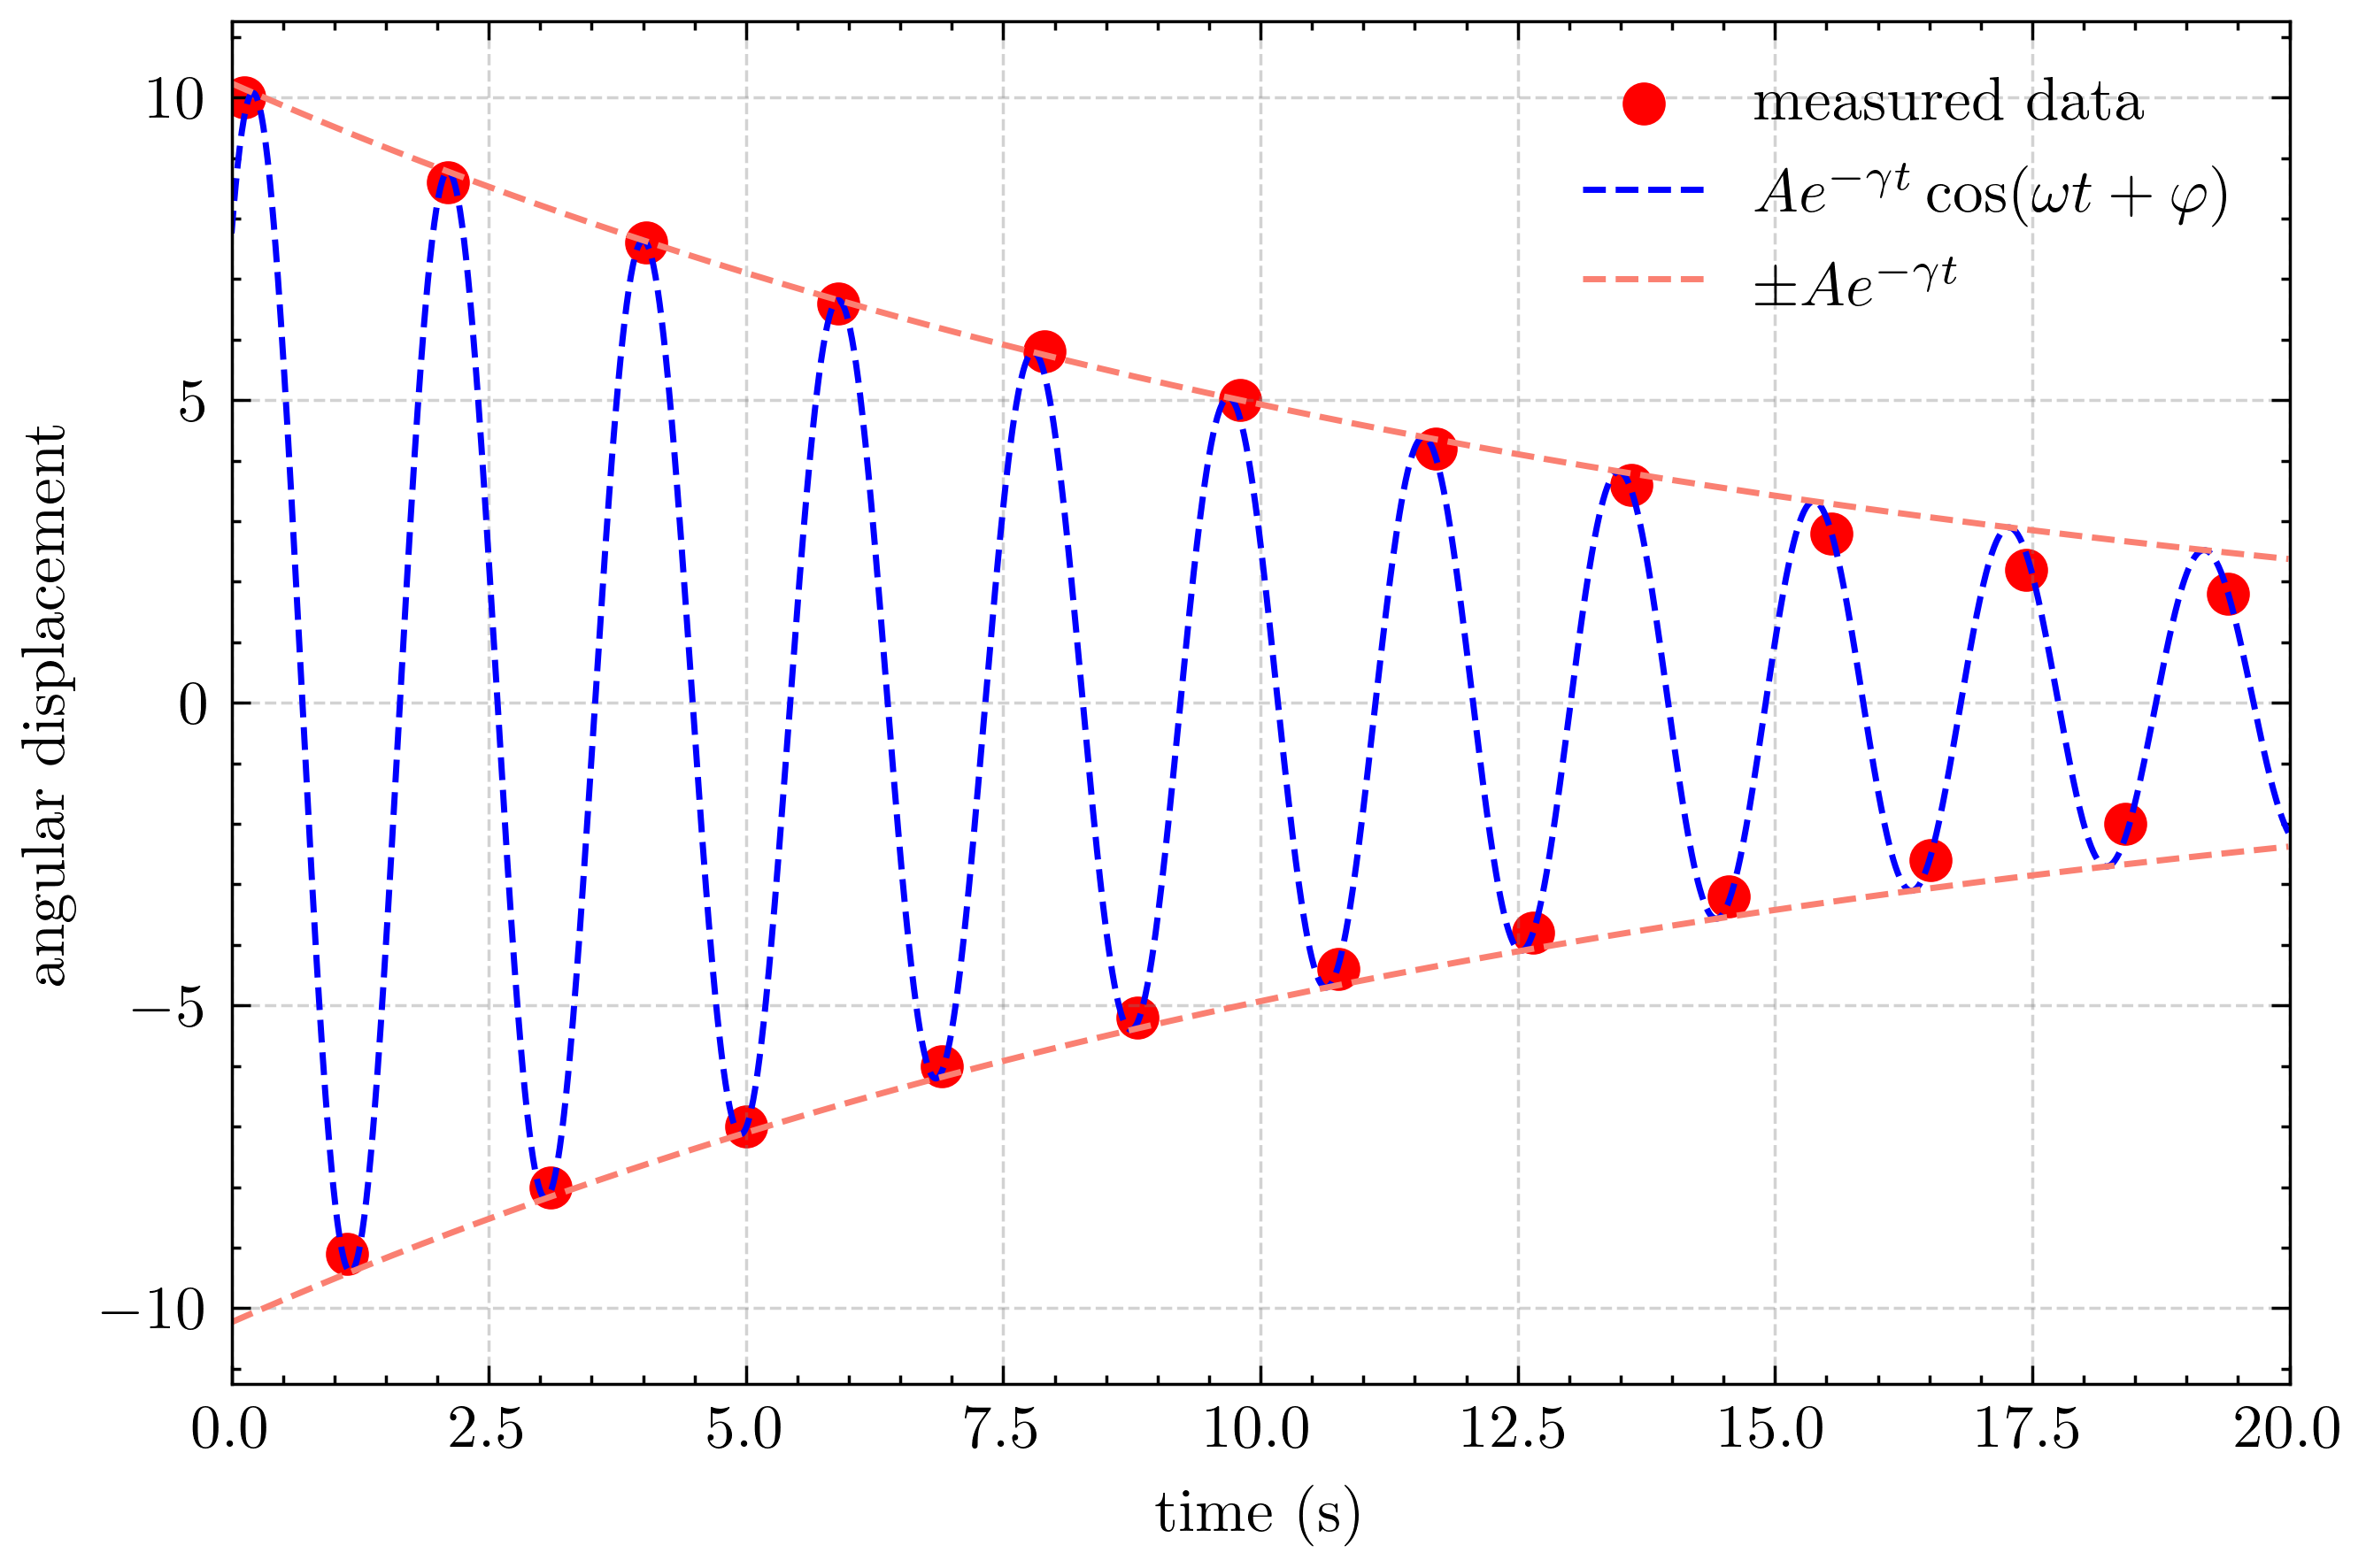

In [65]:
def func(t, A, gamma, omega, phi):
    return A * np.exp(-gamma * t) * np.cos(omega * t + phi)

data0 = np.loadtxt("0.25A", unpack=True, delimiter="\t")

tData = data0[0]
yData = data0[1]

popt, pcov = curve_fit(func, tData, yData, bounds=(0, [20,20,5,20]))

print("A =", popt[0])
print("gamma =", popt[1], "1/s")
print("omega =", popt[2], "rad/s")
print("phi =", popt[3], "rad")

plt.figure(dpi=500, figsize=(6,4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)
plt.scatter(tData, yData, label="measured data", c='r')
plt.plot(np.arange(0, 20, 0.01), func(np.arange(0, 20, 0.01), *popt), "b--", label=r"$Ae^{-\gamma t}\cos(\omega t + \varphi)$")
plt.plot(np.arange(0, 20, 0.01), popt[0]*np.exp(-popt[1]*np.arange(0, 20, 0.01)), "salmon", ls="--", label=r"$\pm Ae^{-\gamma t}$")
plt.plot(np.arange(0, 20, 0.01), -popt[0]*np.exp(-popt[1]*np.arange(0, 20, 0.01)), "salmon", ls="--")
plt.xlim(0, 20)
plt.xlabel("time (s)")
plt.ylabel("angular displacement")
plt.legend()
plt.show()

F = 2.839458367940826
gamma = 0.159586399086295 1/s
omega0 = 3.2724617303089456 rad/s


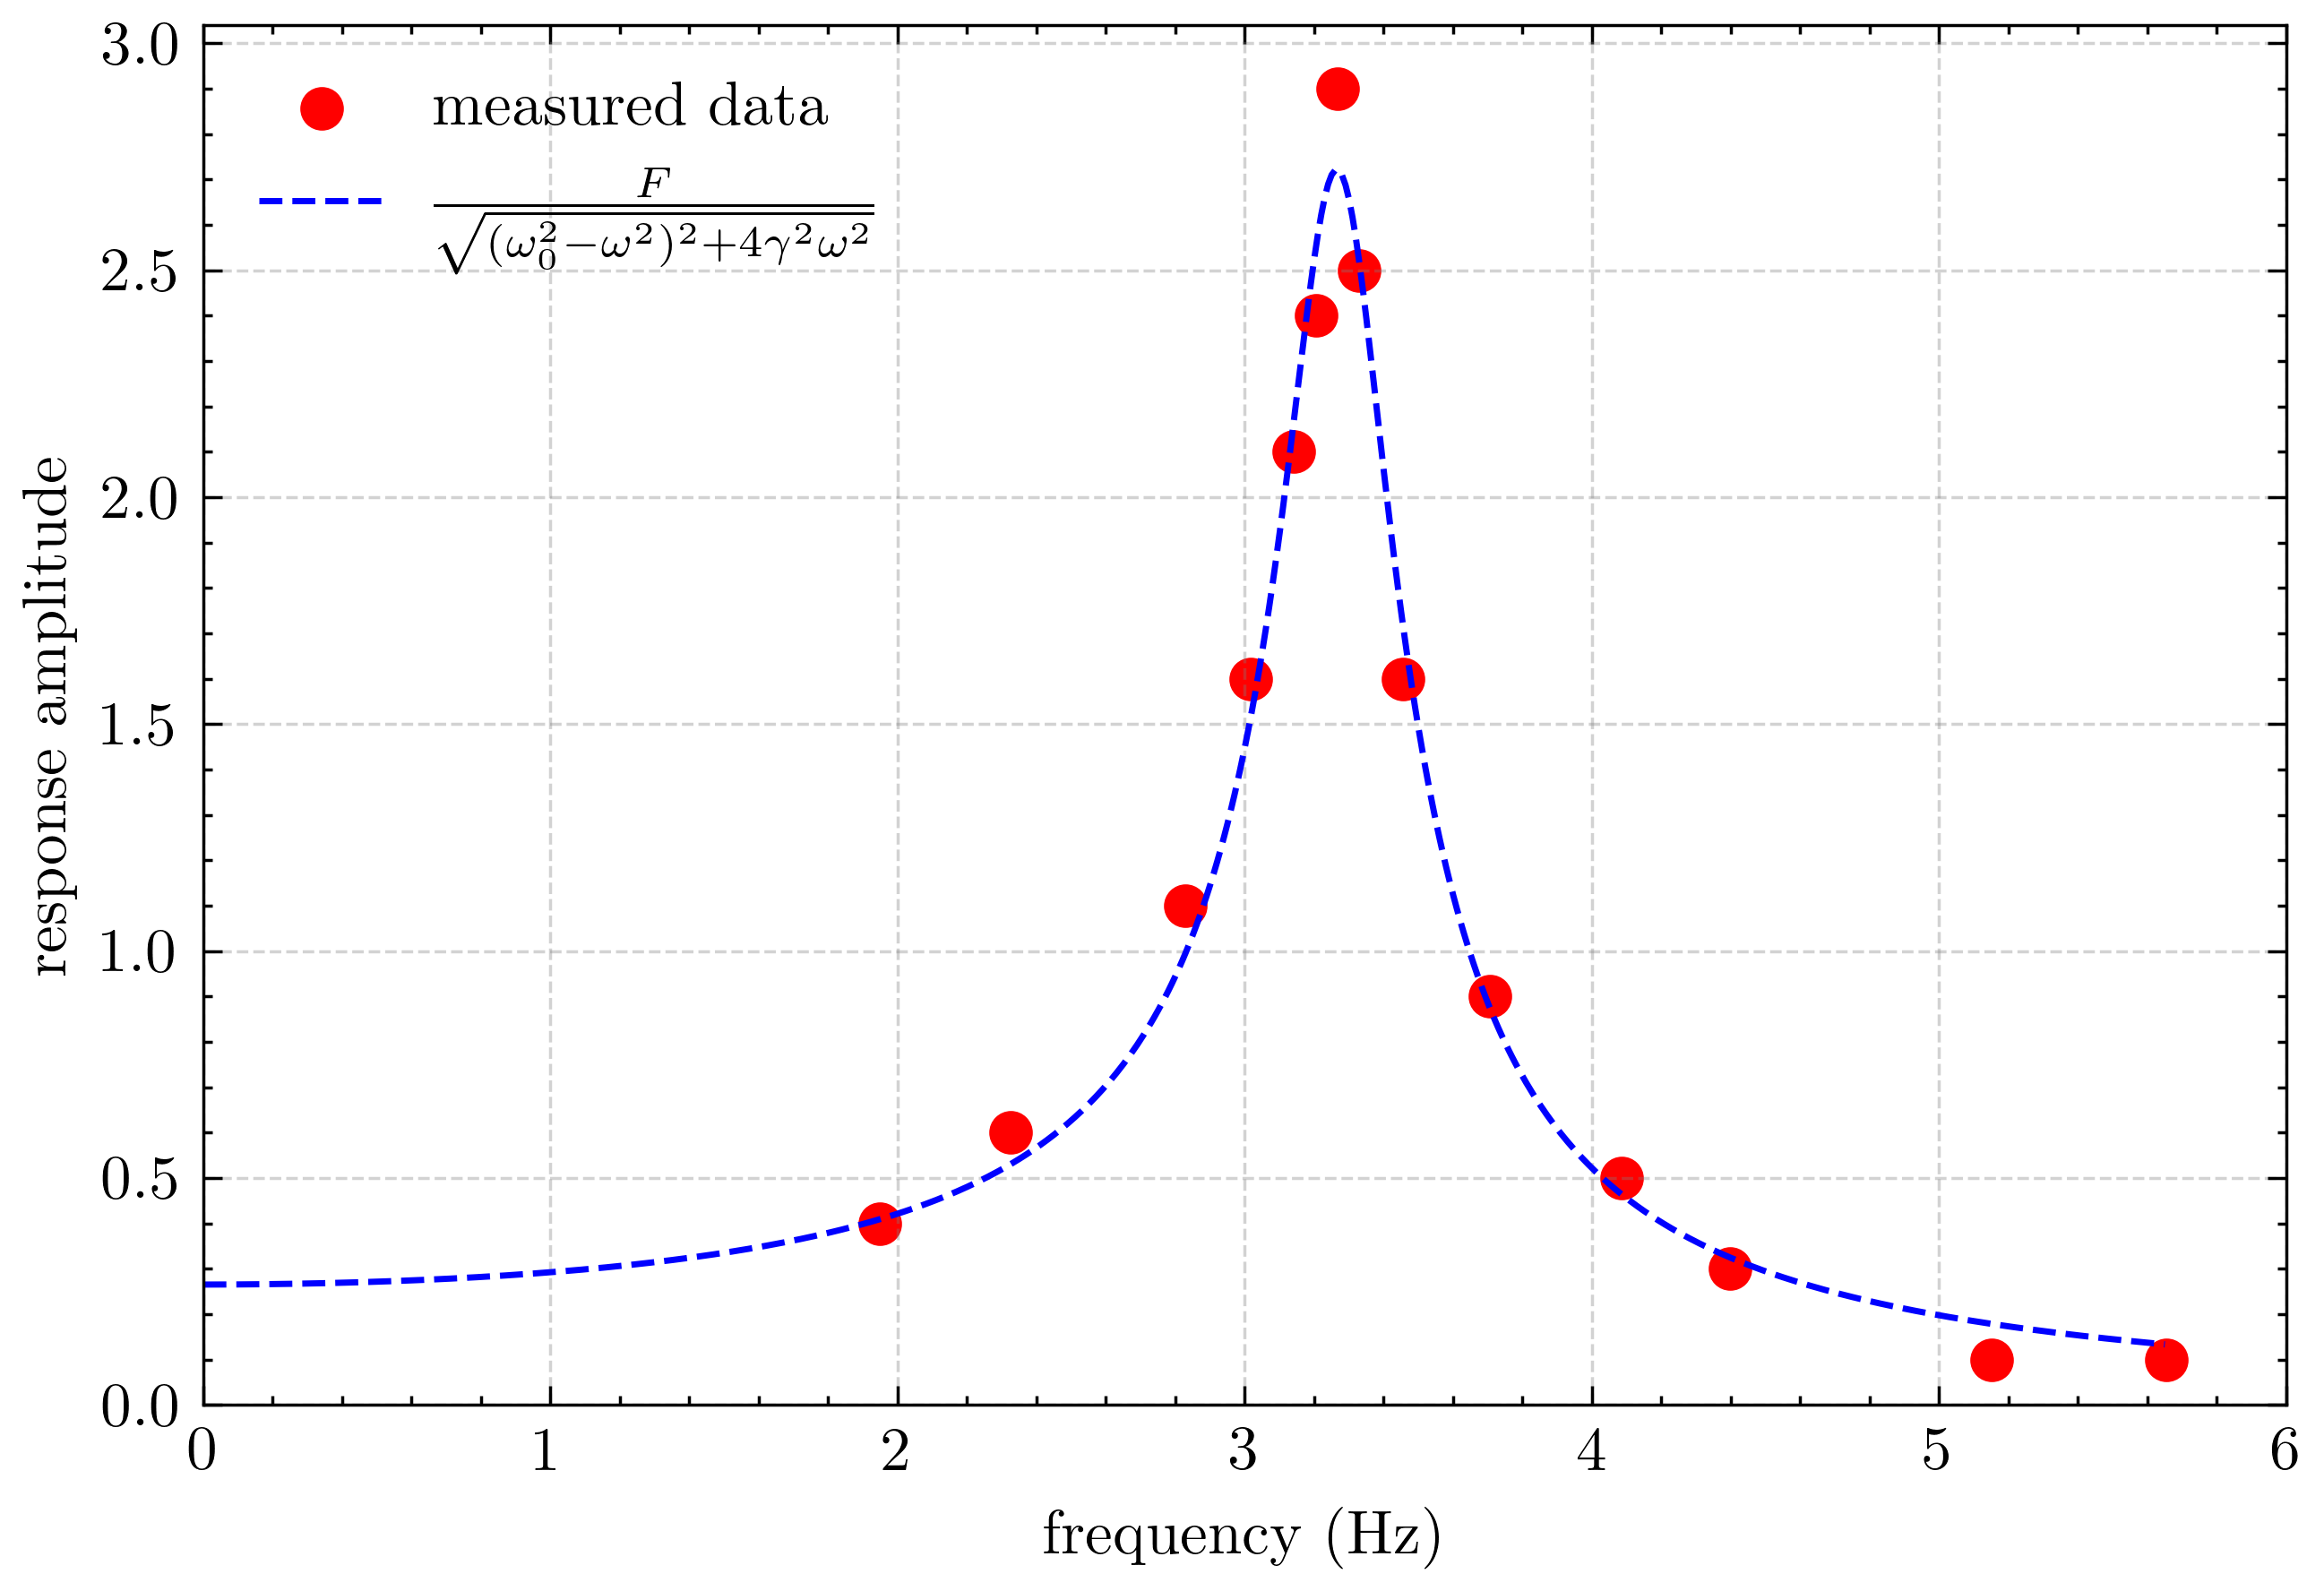

In [66]:
data1 = np.loadtxt("forced_0.55A", unpack=True)

def lorentzian(omega, F, gamma, omega0):
    return F/np.sqrt((omega0**2-omega**2)**2 + 4*(gamma**2)*(omega**2))

freqData = data1[0]
omegaData = freqData*2*np.pi
ampData = data1[1]

popt, pcov = curve_fit(lorentzian, omegaData, ampData, bounds=(0, [10, 10, 10]))

print("F =", popt[0])
print("gamma =", popt[1], "1/s")
print("omega0 =", popt[2], "rad/s")

plt.figure(dpi=500, figsize=(6, 4))
plt.grid(axis="both", c="grey", ls="--", alpha=0.35)
plt.scatter(omegaData, ampData, c="r", label="measured data")
plt.plot(np.arange(0, max(omegaData), 0.01), lorentzian(np.arange(0, max(omegaData), 0.01), *popt), "b--", label=r"$\frac{F}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2\omega^2}}$")
plt.xlabel("frequency (Hz)")
plt.ylabel("response amplitude")
plt.xlim(0, 6)
plt.ylim(0, )
plt.legend(loc="upper left")
plt.show()